In [119]:
import numpy as np
import pandas as pd

Storing file path in a variable for easy access

In [ ]:
file_path = "../Data/Raw Data/titanic - titanic.csv"

In [121]:
#Original data will be stored in "Data" variable
Data = pd.read_csv(file_path)
#Copying data into "df" variable
df=Data
df = pd.DataFrame(df)
# We can use df.head() to see the data but we converted the data into dataframe thus we print df
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Extracting column names from the dataset

In [122]:
column_names = df.columns.tolist()
column_names

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Converting all column names to lowercase

In [123]:
df_lower_cols = df.columns.str.lower()
df_lower_cols

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

Removing any special characters from the column names.

In [128]:
# There were no column names with special charecters so we inserted them
import random
special_chars = ['@', '#', '$', '%', '&', '*', '!', '?']
dfr=df
# Function to insert a random special character at a random position in a string
def insert_random_special_char(col_name):
    char = random.choice(special_chars)
    pos = random.randint(0, len(col_name))
    return col_name[:pos] + char + col_name[pos:]
# Apply to all column names
dfr.columns= [insert_random_special_char(col) for col in dfr.columns]
dfr.columns


Index(['Passenge#rId', 'Sur%vived', '?Pclass', 'N@ame', 'S%ex', 'A$ge',
       '&SibSp', 'Par?ch', '%Ticket', '?Fare', 'C*abin', 'Embarke@d'],
      dtype='object')

In [131]:
dfr_remove_SC = dfr.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)
dfr.columns= dfr.columns.str.replace(r'[^A-Za-z0-9_]', '', regex=True)
dfr_remove_SC

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Checking for missing values in the dataset

gathering the null values in form of 0's and 1's

In [132]:
# Here True(1) and False(0)
df.isna().astype(int)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,1,0,0,0,0,1,0
889,0,0,0,0,0,0,0,0,0,0,0,0


Visualizing missing data using a heatmap

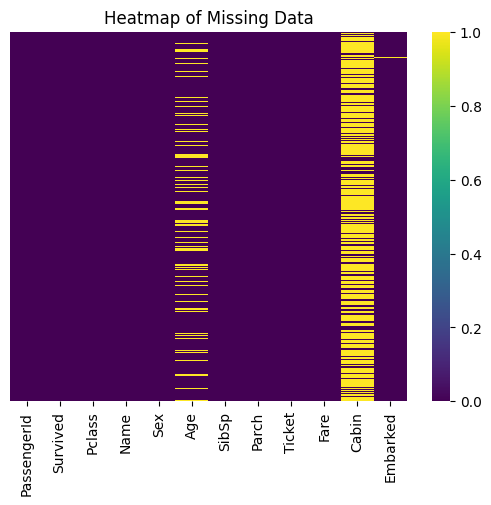

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isna(), cmap='viridis', cbar=True, yticklabels=False)
# Add a title
plt.title('Heatmap of Missing Data')
# Show the plot
plt.show()

Removing "Embarked" column because of no use and it also consist of NAN values

In [137]:
df = df.drop('Embarked', axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148


Saving the cleaned and processed dataset for further use

In [139]:
df.to_csv("../Data/Cleaned Data/titanic - titanic.csv", index=False)